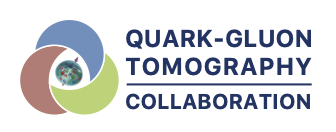

<div class="markdown-google-sans">
  <h1>This notebook shows visualization of data from QGT database</h1>
</div>

<a target="_blank" href="https://github.com/qgtcollab/QGT-database/tree/main/visuals_example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

As an example we will load data from CLAS publication *Phys.Rev.Lett. 115 (2015) 21, 212003* https://inspirehep.net/literature/1358400
and plot one of the experimental bins

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
file = 'https://github.com/qgtcollab/QGT-database/blob/main/Tables/Ref_18_Table_1.csv?raw=true'
df = pd.read_csv(file)

   Unnamed: 0     xB    Q2     t     phi deg/rad   value  stat_u  syst_u  \
0           0  0.126  1.11 -0.11   68.33     deg  8.9354  0.5418  0.7223   
1           1  0.126  1.11 -0.11   82.35     deg  5.7024  0.2823  0.3494   
2           2  0.126  1.11 -0.11   97.13     deg  3.5973  0.2040  0.2525   
3           3  0.126  1.11 -0.11  112.20     deg  2.9545  0.2122  0.1979   
4           4  0.126  1.11 -0.11  127.27     deg  2.6040  0.1803  0.2255   

    col      obs    units hadron lepton  E_lepton  E_hadron  
0  CLAS  d4SigUU  nb/GeV4      p     e-      5.75  0.938272  
1  CLAS  d4SigUU  nb/GeV4      p     e-      5.75  0.938272  
2  CLAS  d4SigUU  nb/GeV4      p     e-      5.75  0.938272  
3  CLAS  d4SigUU  nb/GeV4      p     e-      5.75  0.938272  
4  CLAS  d4SigUU  nb/GeV4      p     e-      5.75  0.938272  


Show the header of the dataframe

In [13]:
df

,Unnamed: 0,xB,Q2,t,phi,deg/rad,value,stat_u,syst_u,col,obs,units,hadron,lepton,E_lepton,E_hadron
0,0,0.126,1.11,-0.11,68.33,deg,8.9354,0.5418,0.7223,CLAS,d4SigUU,nb/GeV4,p,e-,5.75,0.938272
1,1,0.126,1.11,-0.11,82.35,deg,5.7024,0.2823,0.3494,CLAS,d4SigUU,nb/GeV4,p,e-,5.75,0.938272
2,2,0.126,1.11,-0.11,97.13,deg,3.5973,0.2040,0.2525,CLAS,d4SigUU,nb/GeV4,p,e-,5.75,0.938272
3,3,0.126,1.11,-0.11,112.20,deg,2.9545,0.2122,0.1979,CLAS,d4SigUU,nb/GeV4,p,e-,5.75,0.938272
4,4,0.126,1.11,-0.11,127.27,deg,2.6040,0.1803,0.2255,CLAS,d4SigUU,nb/GeV4,p,e-,5.75,0.938272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1928,0.475,3.77,-0.45,292.77,deg,0.0086,0.0013,0.0020,CLAS,d4SigUU,nb/GeV4,p,e-,5.75,0.938272
1929,1929,0.475,3.77,-0.45,307.78,deg,0.0153,0.0018,0.0020,CLAS,d4SigUU,nb/GeV4,p,e-,5.75,0.938272
1930,1930,0.475,3.77,-0.45,322.77,deg,0.0168,0.0017,0.0019,CLAS,d4SigUU,nb/GeV4,p,e-,5.75,0.938272
1931,1931,0.475,3.77,-0.45,337.68,deg,0.0225,0.0018,0.0023,CLAS,d4SigUU,nb/GeV4,p,e-,5.75,0.938272


We will choose the bin $x = 0.126$, $Q^2 = 1.11$ GeV$^2$, $-t=0.11$ GeV$^2$

In [16]:
# choose the bin to plot
x_bin  = 0.185
Q2_bin = 1.63
t_bin  = 0.15
bin_to_plot = "xB == " + str(x_bin)+ " and Q2 == " + str(Q2_bin)+ " and t == " + str(t_bin) + " and value != 0"

In [17]:
plot_df = df.query(bin_to_plot)

Text(0, 0.5, '${d^4\\sigma}~({\\rm nb/GeV^4})$')

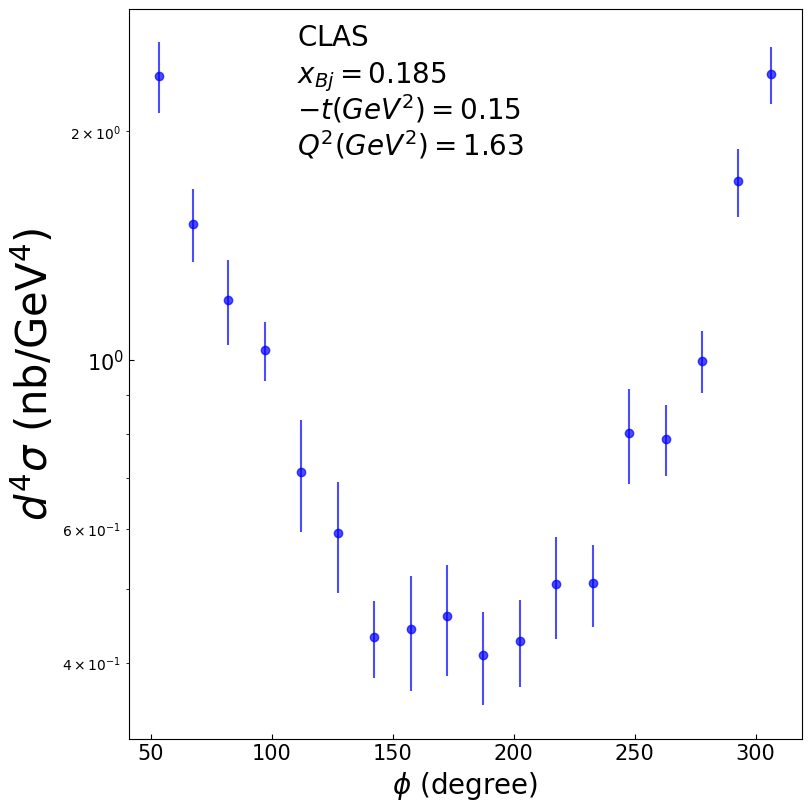

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8), constrained_layout = True)
ax.errorbar(plot_df.phi, plot_df.value,yerr=np.sqrt(plot_df.stat_u**2+ plot_df.syst_u**2),fmt='o',c='b',alpha=0.7)
ax.tick_params(direction='in',labelsize=15)
ax.set_yscale('log')
ax.text(0.25,0.95,r'$\rm CLAS$',transform=ax.transAxes,size=20)
ax.text(0.25,0.9,r'$x_{Bj} = %.3f$'%(x_bin),transform=ax.transAxes,size=20)
ax.text(0.25,0.85,r'$-t (GeV^2) = %.2f$'%(t_bin),transform=ax.transAxes,size=20)
ax.text(0.25,0.8,r'$Q^2 (GeV^2) = %.2f$'%(Q2_bin),transform=ax.transAxes,size=20)
ax.set_xlabel(r'$\phi~({\rm degree})$',size=20)
ax.set_ylabel(r'${d^4\sigma}~({\rm nb/GeV^4})$',size=30)